#**Analise de Dados**



#***Series***

In [1]:
import pandas as pd
import numpy as np

In [2]:
labels = ['a','b','c']

In [3]:
my_list = [10,11,12]
arr1 = np.array([11,22,33])
df = {'a' :10 ,'b':33,'c':32}

In [4]:
pd.Series(data = my_list , index = labels)

a    10
b    11
c    12
dtype: int64

In [5]:
series = pd.Series(data = my_list , index = labels)
series ['c']# ele pegar o item pelo Index que seria o C 

12

In [6]:
pd.Series(labels , my_list)

10    a
11    b
12    c
dtype: object

In [7]:
gue1 = pd.Series([1,2,3,4],['EUA','JP','URSS','Alemanha'])
gue1

EUA         1
JP          2
URSS        3
Alemanha    4
dtype: int64

In [8]:
gue2 = pd.Series([1,2,3,4],['EUA','JP','URSS','italia'])
gue2

EUA       1
JP        2
URSS      3
italia    4
dtype: int64

In [9]:
gue1 + gue2 # ele soma os index de cada um e , os valores distintos são  NaN

Alemanha    NaN
EUA         2.0
JP          4.0
URSS        6.0
italia      NaN
dtype: float64

#***DataFrame***

In [10]:
np.random.seed(101)

In [11]:
df = pd.DataFrame(np.random.randn(5,4),index ='A B C D E '.split(),columns='X Y Z W'.split())
df

,X,Y,Z,W
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [12]:
df['Z']

A    0.907969
B   -0.848077
C    0.528813
D   -0.933237
E    2.605967
Name: Z, dtype: float64

In [13]:
type(df['Z'])

pandas.core.series.Series

In [14]:
df.Y #não recomendado pois pode gerar conflito com o banco de dados , pois da o mesmo request

A    0.628133
B   -0.319318
C    0.740122
D   -0.758872
E    1.978757
Name: Y, dtype: float64

In [15]:
df['Novo'] = df['Z']+df['Y']
df

,X,Y,Z,W,Novo
A,2.706850,0.628133,0.907969,0.503826,1.536102
B,0.651118,-0.319318,-0.848077,0.605965,-1.167395
C,-2.018168,0.740122,0.528813,-0.589001,1.268936
D,0.188695,-0.758872,-0.933237,0.955057,-1.692109
E,0.190794,1.978757,2.605967,0.683509,4.584725


In [16]:
df.drop("Novo",axis=1,inplace = True)

In [17]:
df


,X,Y,Z,W
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [18]:
df.loc[['A','B'],['X','Y']]# pelo valor 

,X,Y
A,2.706850,0.628133
B,0.651118,-0.319318


In [19]:
df.iloc[2: , 3:] #indice da linha 2(aparti do C)  a da coluna indice 3 (W) , # pelo indece

,W
C,-0.589001
D,0.955057
E,0.683509


In [20]:
ox = df > 0 
ox

,X,Y,Z,W
A,True,True,True,True
B,True,False,False,True
C,False,True,True,False
D,True,False,False,True
E,True,True,True,True


In [21]:
df[ox] #Os que são False ele gera uma saida NaN

,X,Y,Z,W
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,NaN,NaN,0.605965
C,NaN,0.740122,0.528813,NaN
D,0.188695,NaN,NaN,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [22]:
df[df['Z']>0]['Y']# Ele pega o primeiro filtro com ['W']>0 com o segundo filtro ['Y'] , ele pega onde Z e Y tem valor
#maior que zero , positivos .

A    0.628133
C    0.740122
E    1.978757
Name: Y, dtype: float64

#***Graficos***

#**Seaborn**

In [23]:
import pandas  as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
%matplotlib inline

In [25]:
iris = sns.load_dataset("iris")
dots= sns.load_dataset("dots")
tips = sns.load_dataset('tips')

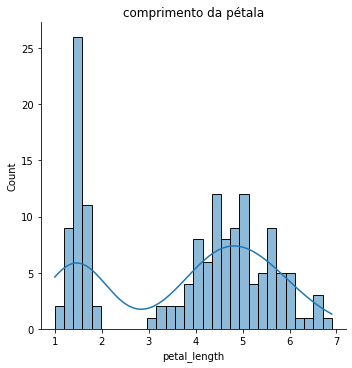

In [26]:
#bins= nivel de detalhamento das colunas 
#kde = cuvar de concentração no grafico 

sns.displot(iris['petal_length'],kde = True, bins = 30)
plt.title("comprimento da pétala")
plt.show()

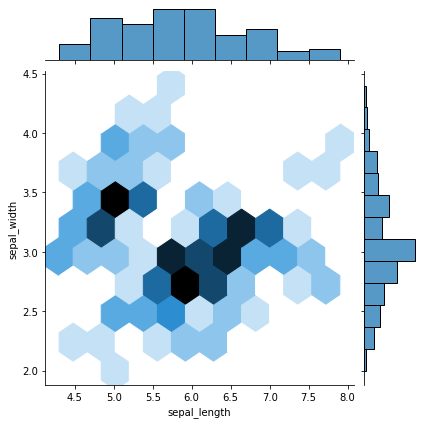

In [27]:
sns.jointplot(x= "sepal_length",y='sepal_width',data= iris,kind='hex',bins = 90)

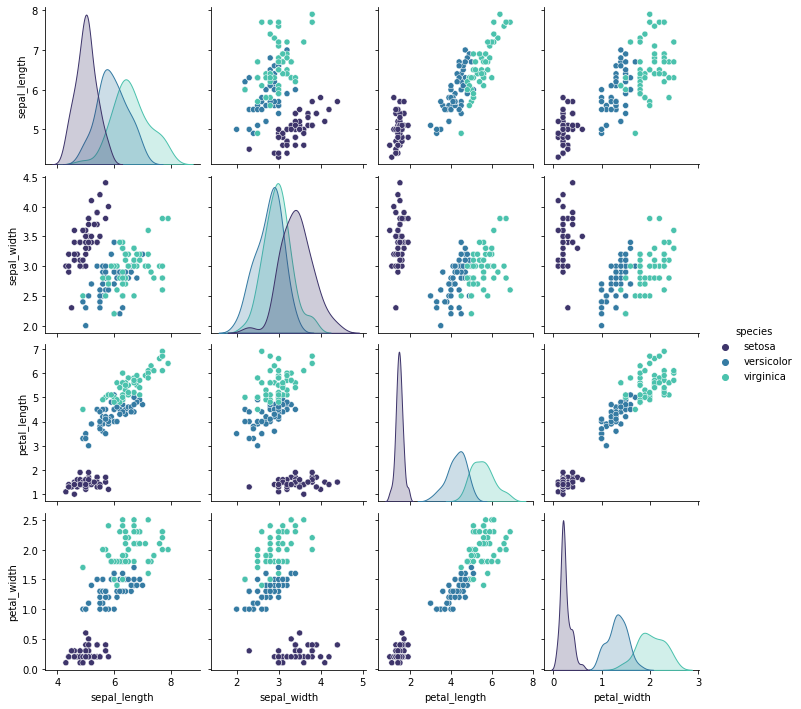

In [28]:
sns.pairplot(iris , hue='species',palette="mako")
plt.show()

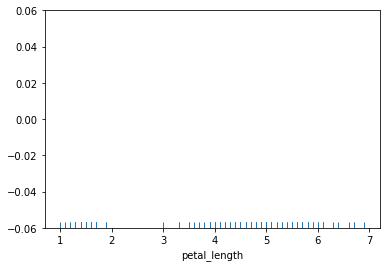

In [29]:
sns.rugplot(iris['petal_length'])

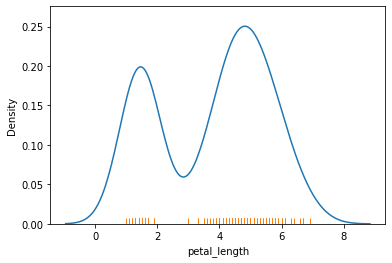

In [30]:
sns.kdeplot(iris['petal_length'])
sns.rugplot(iris['petal_length'])

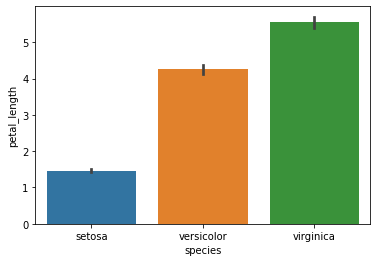

In [31]:
sns.barplot(y='petal_length',data=iris,x='species')

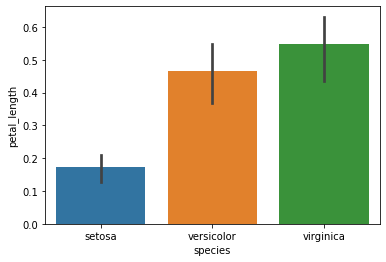

In [32]:
sns.barplot(y='petal_length',data=iris,x='species',estimator=np.std) # ele da o desvio padrão
plt.show()

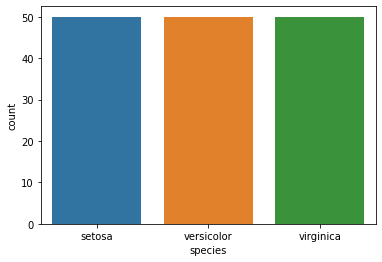

In [33]:
sns.countplot(x ='species', data=iris)
plt.show()

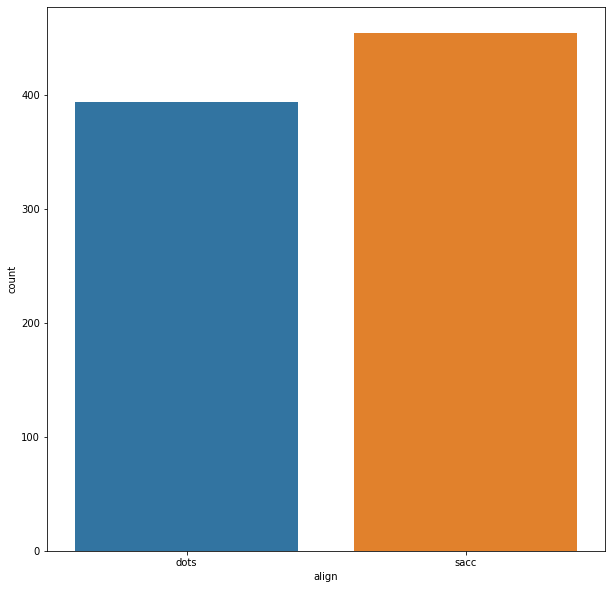

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'align', data=dots)
plt.show()

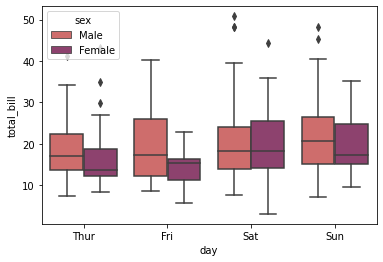

In [35]:
sns.boxplot(data=tips , x='day', y = 'total_bill',hue='sex',palette='flare')
plt.show()

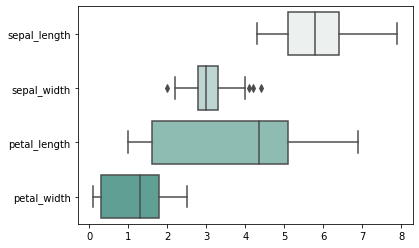

In [36]:
sns.boxplot(data=iris,palette='light:#5A9', orient='h')
plt.show()

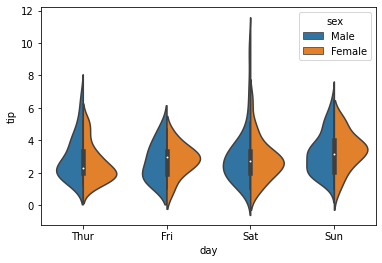

In [37]:
sns.violinplot(x='day', y ='tip',data= tips, hue='sex',split=True)
plt.show()

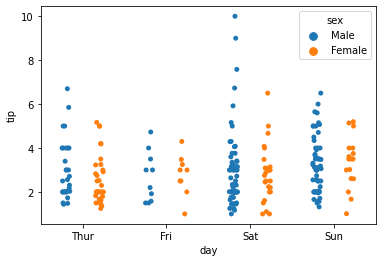

In [38]:
sns.stripplot(x='day', y ='tip',data= tips, hue='sex',dodge=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


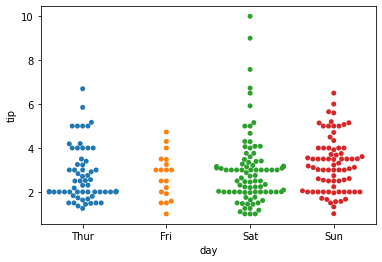

In [39]:
sns.swarmplot(x='day', y ='tip',data= tips)

***Plots matriciais***


In [40]:
import pandas as pd 
import numpy as nb 
import matplotlib.pyplot as plt
#import matplotlib as plt
import seaborn as sns 
#%matplotlib inline

In [41]:
ft = sns.load_dataset("flights")
tips = sns.load_dataset("tips")

In [42]:
corr = tips.corr() # ele faz as correlção apenas das colunas que é numericas
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


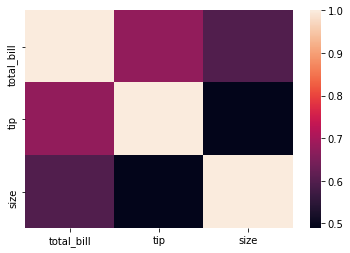

In [43]:
sns.heatmap(corr)

In [44]:
ft

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [45]:
mf = ft.pivot_table(values='passengers', index = 'month',columns='year')


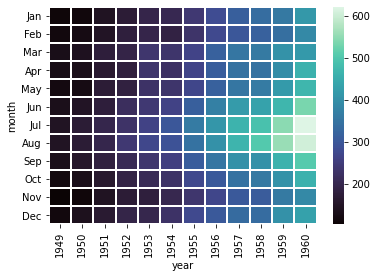

In [46]:
sns.heatmap(mf, linecolor='white',linewidths=1,cmap='mako')
plt.show()

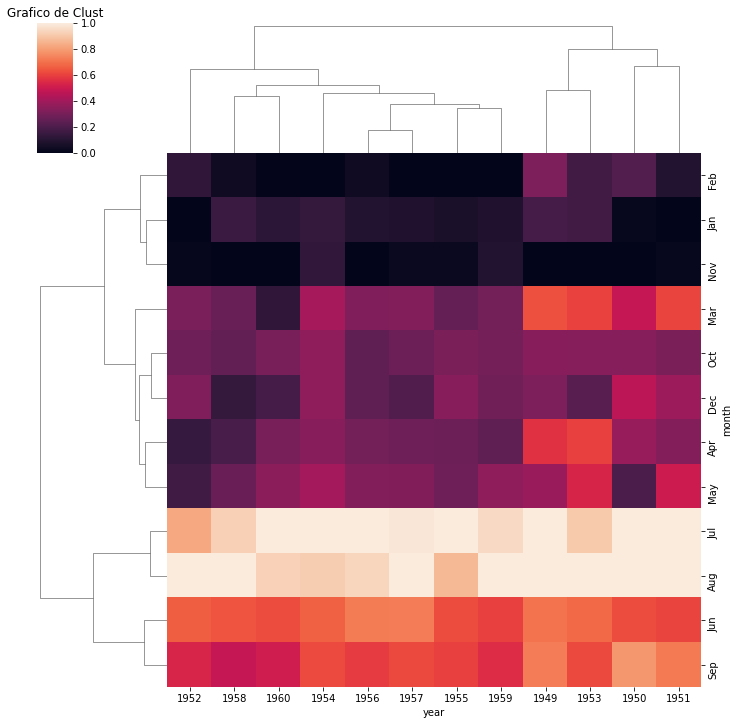

In [47]:
sns.clustermap(mf,standard_scale= 1)
plt.title("Grafico de Clust")
plt.show()

***Plot de Regressão***

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 216x216 with 0 Axes>

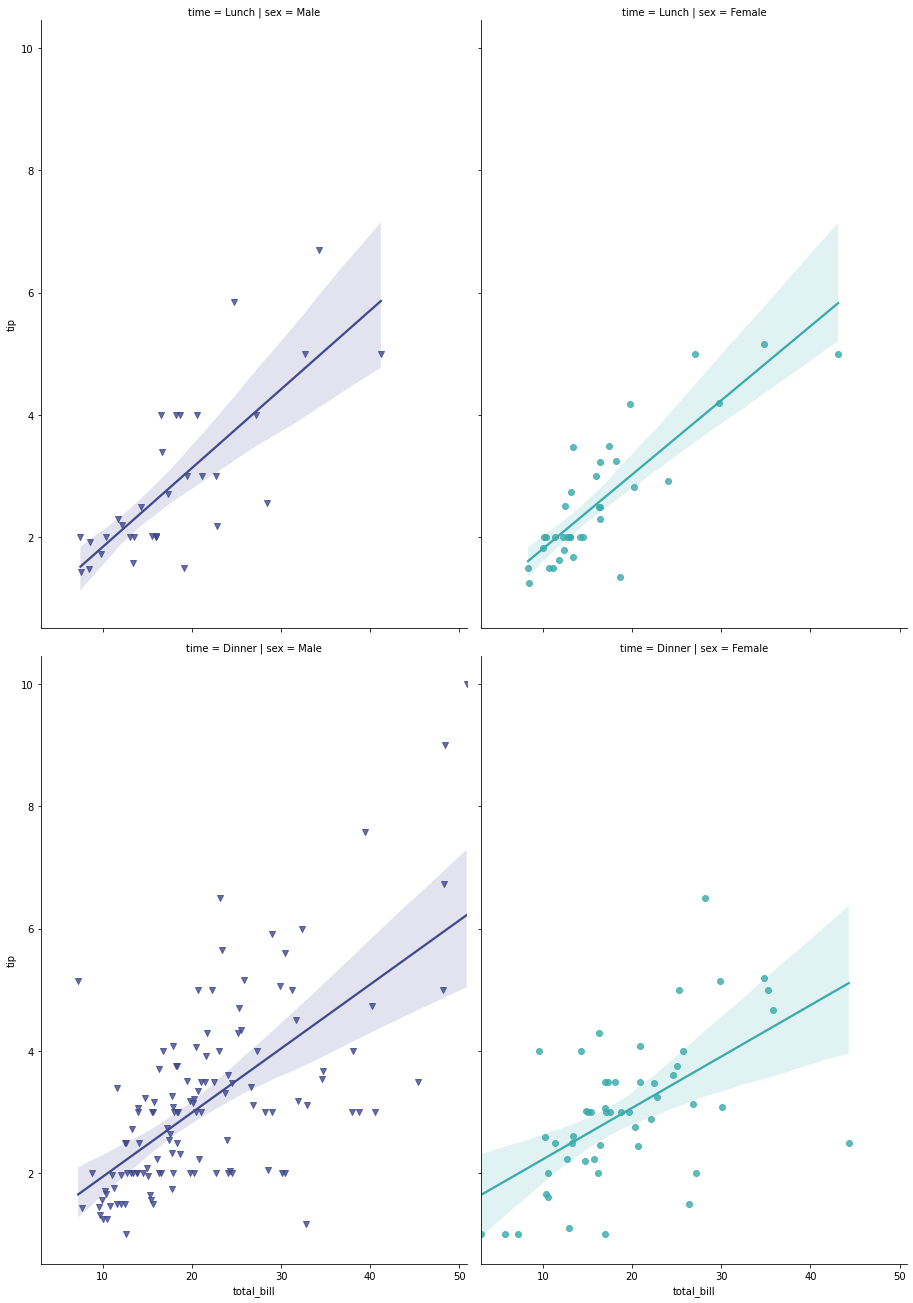

In [50]:
plt.figure(figsize=(3,3))
sns.lmplot(x='total_bill',y='tip',data= tips,hue='sex',palette='mako', markers=['v','o'],col='sex',row='time',aspect= 0.7,size=9)
plt.show()

***PairGrids***

In [51]:
import seaborn as sns 
iris = sns.load_dataset('iris')

In [52]:
iris.head(20)
#iris.info()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


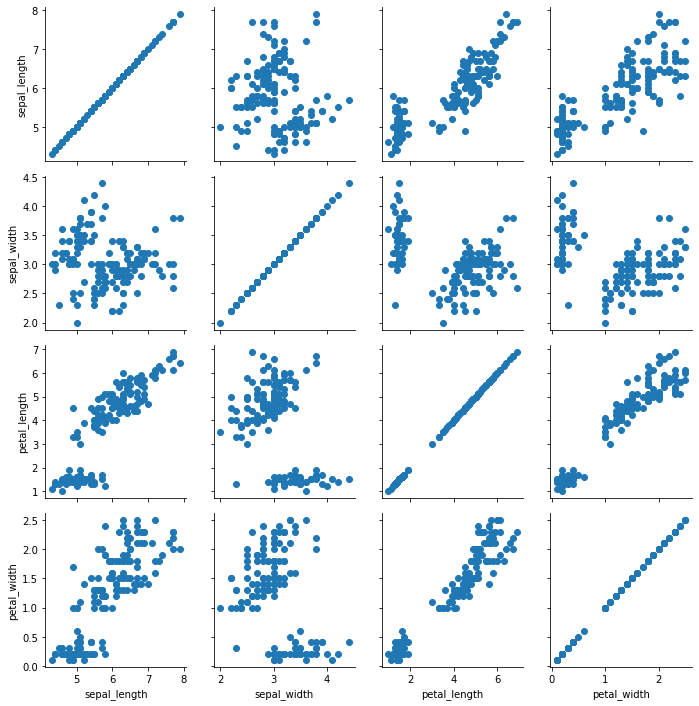

In [53]:
h = sns.PairGrid(iris)
h.map(plt.scatter)
plt.show()

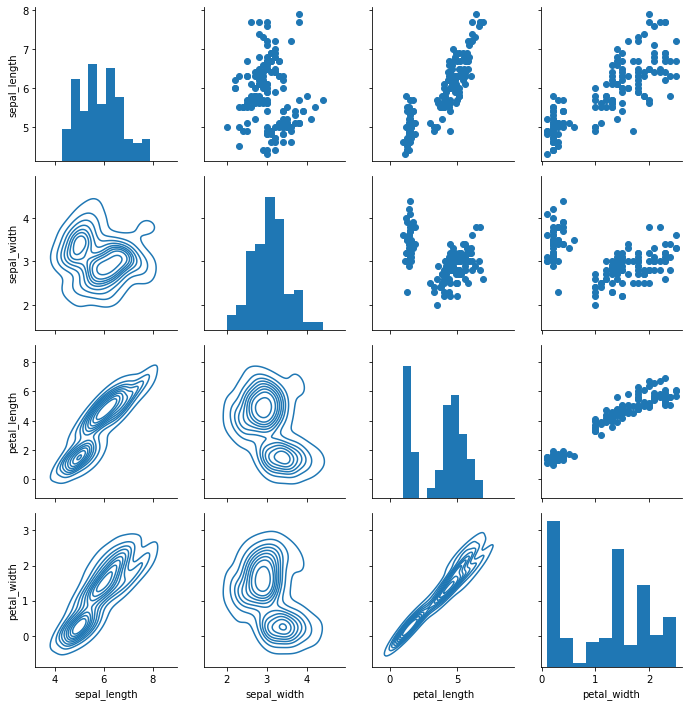

In [54]:
h = sns.PairGrid(iris)
h.map_diag(plt.hist)
h.map_upper(plt.scatter)
h.map_lower(sns.kdeplot)
plt.show()

***Exercicio - Seaborn***


In [55]:
import seaborn as sns 
data_titanic = sns.load_dataset("titanic")

In [56]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


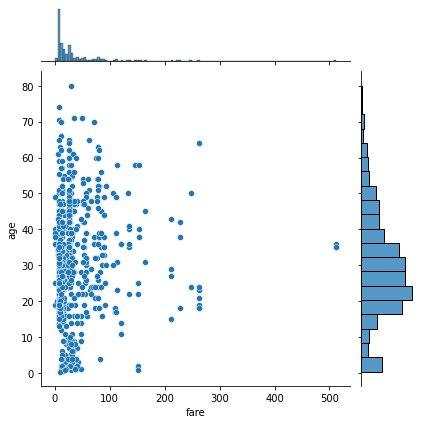

In [57]:
sns.jointplot(x='fare', y='age', data=data_titanic)

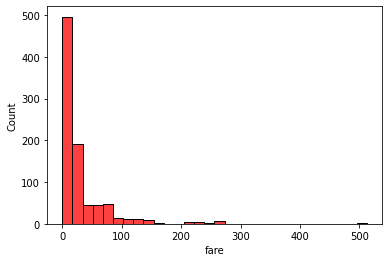

In [58]:
sns.histplot(x='fare',data= data_titanic, color='red', bins = 30)
import matplotlib.pyplot as plt

plt.show()

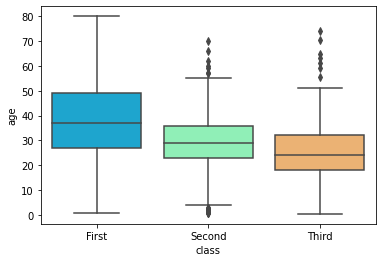

In [59]:
sns.boxplot(x= 'class', y ='age',data=data_titanic ,palette='rainbow')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


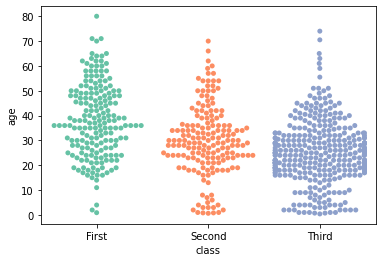

In [60]:
sns.swarmplot(x='class',y='age',data=data_titanic ,palette='Set2')#swarmplot
plt.show()

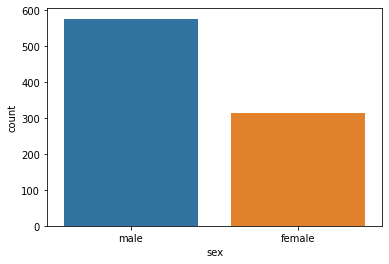

In [61]:
sns.countplot(data=data_titanic,x='sex')

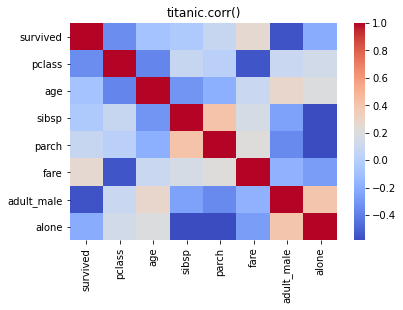

In [62]:
corr = data_titanic.corr()
plt.title('titanic.corr()')
sns.heatmap(corr,cmap='coolwarm')
plt.show()

#***Plotly e Cufflinks*** \ **Graficos Dinamicos** 


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [64]:
init_notebook_mode(connected=True)
cf.go_offline()

In [65]:
iris=sns.load_dataset("iris")